<a href="https://colab.research.google.com/github/amarviswanathan/introduction-to-tensorflow/blob/master/Exercise2_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

1.13.1


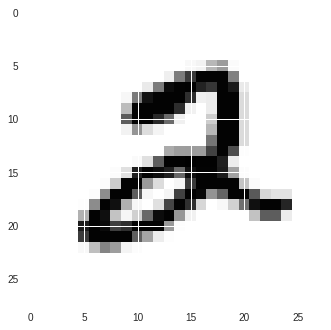

In [0]:
# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
# YOUR CODE SHOULD START HERE

import matplotlib.pyplot as plt
plt.imshow(x_train[5])



In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

x_train = x_train/255.0
x_test = x_test/255.0

callbacks = myCallback()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,callbacks=[callbacks])

# YOUR CODE SHOULD START HERE
# YOUR CODE SHOULD END HERE

Epoch 1/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.1998 - acc: 0.9406
Epoch 2/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0818 - acc: 0.9750
Epoch 3/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.0531 - acc: 0.9833
Epoch 4/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.0379 - acc: 0.9883
Epoch 5/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0269 - acc: 0.9915
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 13s 217us/sample - loss: 0.0269 - acc: 0.9915
